In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/image-processing-data/10card.png
/kaggle/input/image-processing-data/big10.png
/kaggle/input/image-processing-data/object.png
/kaggle/input/image-processing-data/Finding/1.jpg
/kaggle/input/image-processing-data/Finding/3.jpg
/kaggle/input/image-processing-data/Finding/2.jpg
/kaggle/input/image-processing-data/Counting/rabbit_template.jpeg
/kaggle/input/image-processing-data/Counting/rabbit.jpeg
/kaggle/input/image-processing-data/Counting/cat.jpg
/kaggle/input/image-processing-data/Counting/mouse.jpg
/kaggle/input/image-processing-data/Counting/pair_boot.jpg
/kaggle/input/image-processing-data/Counting/rabbit2.png


In [2]:
!pip install opencv-contrib-python
!pip install imutils

  Preparing metadata (setup.py) ... - \ done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=37a70efd56eb4a0ef18b57d74959ad3d8a227f83ad9aced7c6376bac6fb72be6
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


(1500, 1200, 3)
(310, 240)


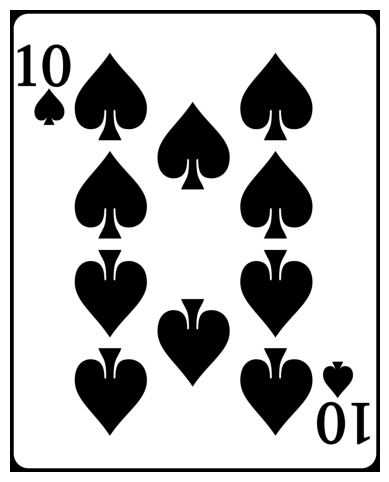

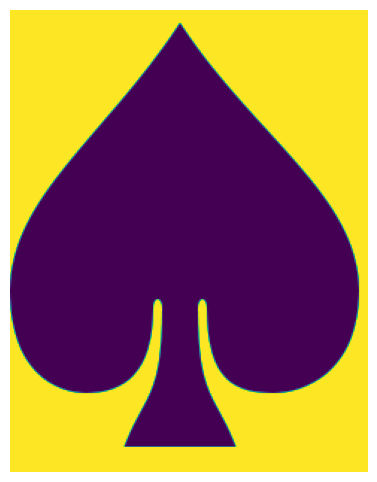

In [3]:
import cv2 
import matplotlib.pyplot as plt

def imshow(img, figsize=(6, 6), title=""):
    fig, ax = plt.subplots(1, 1, figsize=(figsize))
    ax.set_title(title)
    ax.axis('off')
    ax.imshow(img)
    
img = cv2.imread('/kaggle/input/image-processing-data/10card.png')
#Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('/kaggle/input/image-processing-data/object.png', 0)
w, h = template.shape[1], template.shape[0]
template_height, template_width = h, w
imshow(img)
imshow(template)
print(img.shape)
print(template.shape)

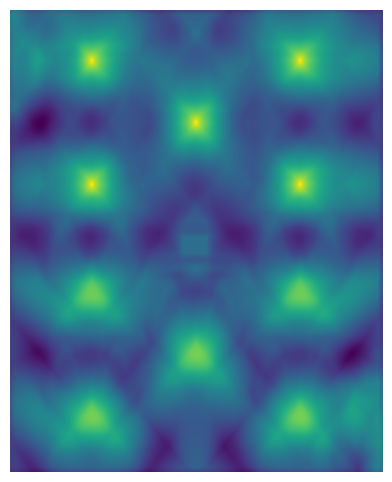

In [4]:
res = cv2.matchTemplate(img_gray,template, cv2.TM_CCOEFF_NORMED)
imshow(res)

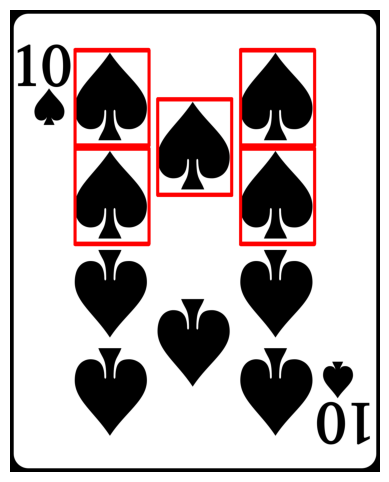

In [5]:
THRESHOLD = 0.9
loc = np.where(res >= THRESHOLD)

#Draw boudning box
for y, x in zip(loc[0], loc[1]):
    cv2.rectangle(img, (x, y), (x + w, y + h), (255,0,0), 1)
imshow(img)

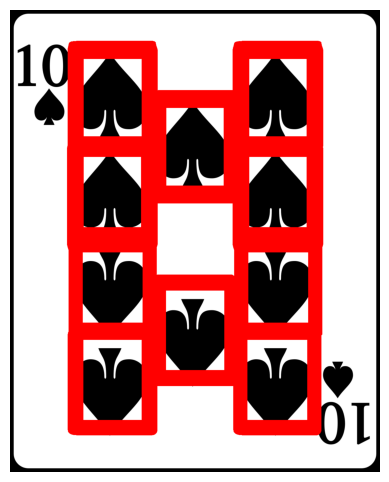

In [6]:
THRESHOLD = 0.6

img = cv2.imread('/kaggle/input/image-processing-data/10card.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res = cv2.matchTemplate(img_gray,template, cv2.TM_CCOEFF_NORMED)
loc = np.where(res >= THRESHOLD)

for y, x in zip(loc[0], loc[1]):
    cv2.rectangle(img, (x, y), (x + w, y + h), (255,0,0), 1)
imshow(img)

[[ 0.00945508  0.01403334  0.01891874 ... -0.33844572 -0.34014702
  -0.34144178]
 [ 0.01690397  0.02146553  0.02632919 ... -0.33293164 -0.33463642
  -0.33593157]
 [ 0.02428594  0.02885299  0.0337405  ... -0.3272359  -0.32894698
  -0.3302446 ]
 ...
 [-0.32063204 -0.322399   -0.3239991  ... -0.02703422 -0.03100298
  -0.03461012]
 [-0.32642844 -0.32817894 -0.32976225 ... -0.03409491 -0.03793336
  -0.04137316]
 [-0.33215973 -0.33389378 -0.33546036 ... -0.04110429 -0.04480524
  -0.0480823 ]]


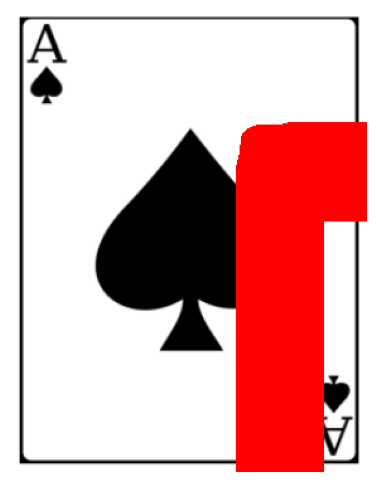

In [7]:
THRESHOLD = 0.5

img_2 = cv2.imread('/kaggle/input/image-processing-data/big10.png')
img_gray_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
res_2 = cv2.matchTemplate(img_gray_2,template, cv2.TM_CCOEFF_NORMED)
loc_2 = np.where(res >= THRESHOLD)
print(res)
for y, x in zip(loc_2[0], loc_2[1]):
    cv2.rectangle(img_2, (x, y), (x + w, y + h), (255,0,0), 1)
imshow(img_2)
# imshow(template)

[[ 0.00945508  0.01403334  0.01891874 ... -0.33844572 -0.34014702
  -0.34144178]
 [ 0.01690397  0.02146553  0.02632919 ... -0.33293164 -0.33463642
  -0.33593157]
 [ 0.02428594  0.02885299  0.0337405  ... -0.3272359  -0.32894698
  -0.3302446 ]
 ...
 [-0.32063204 -0.322399   -0.3239991  ... -0.02703422 -0.03100298
  -0.03461012]
 [-0.32642844 -0.32817894 -0.32976225 ... -0.03409491 -0.03793336
  -0.04137316]
 [-0.33215973 -0.33389378 -0.33546036 ... -0.04110429 -0.04480524
  -0.0480823 ]]


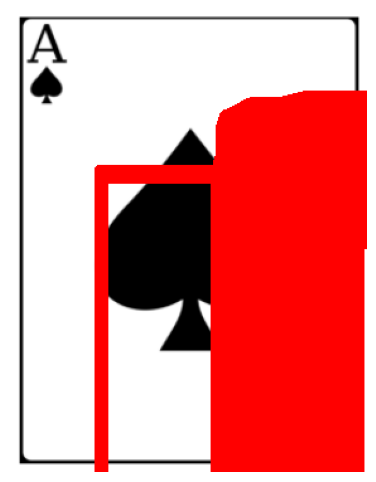

In [8]:
THRESHOLD = 0.3

img_2 = cv2.imread('/kaggle/input/image-processing-data/big10.png')
img_gray_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
res_2 = cv2.matchTemplate(img_gray_2,template, cv2.TM_CCOEFF_NORMED)
loc_2 = np.where(res >= THRESHOLD)
print(res)
for y, x in zip(loc_2[0], loc_2[1]):
    cv2.rectangle(img_2, (x, y), (x + w, y + h), (255,0,0), 1)
imshow(img_2)


/tmp/ipykernel_17/1198038370.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(figsize))


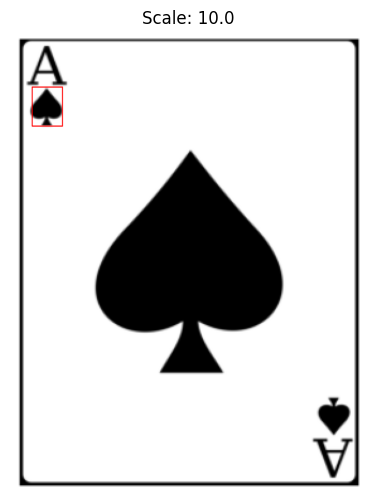

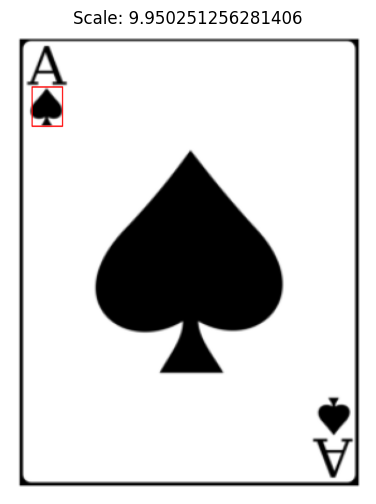

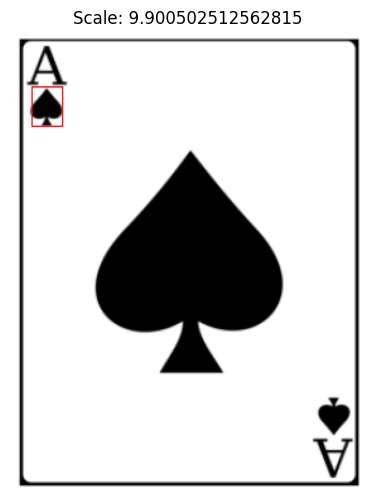

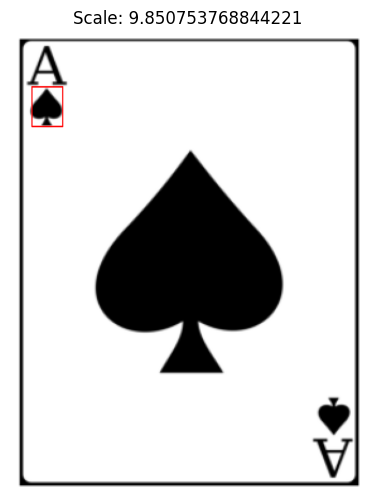

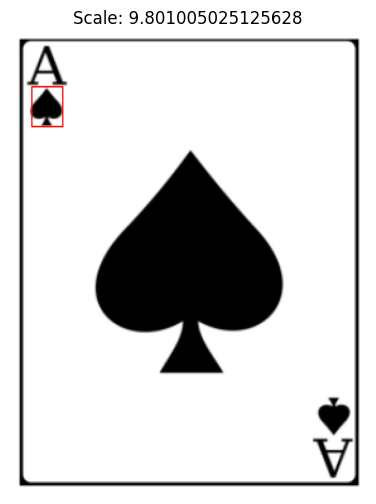

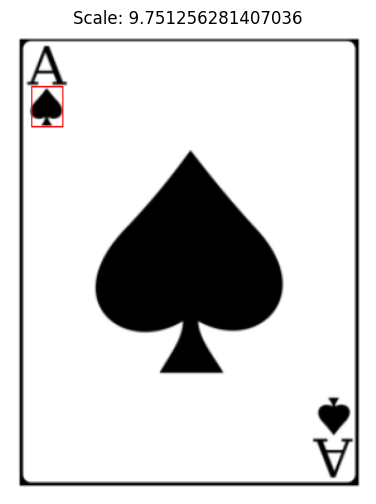

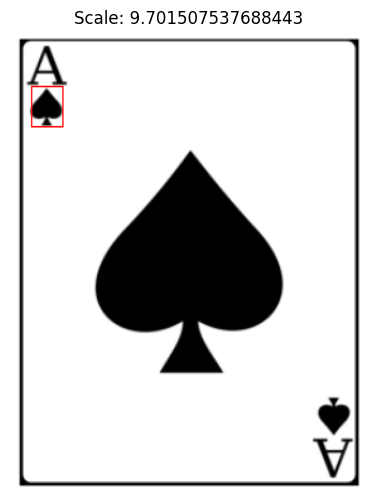

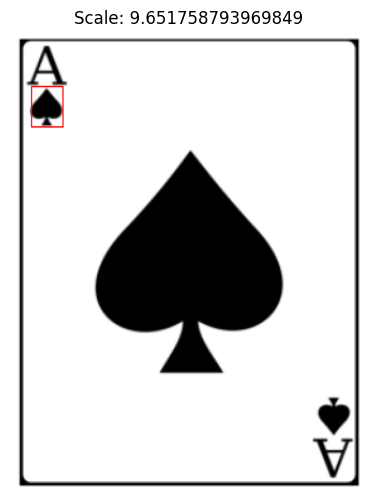

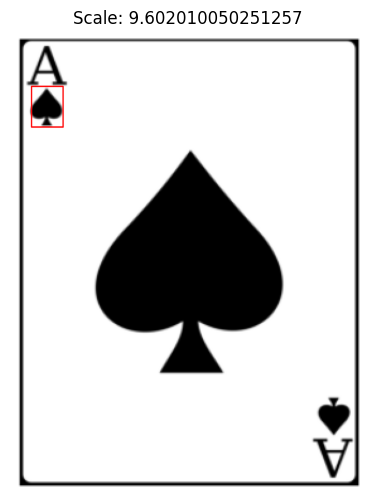

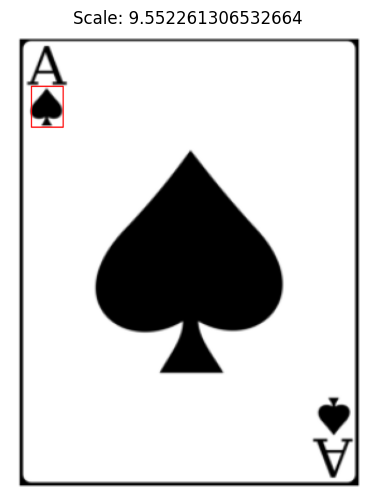

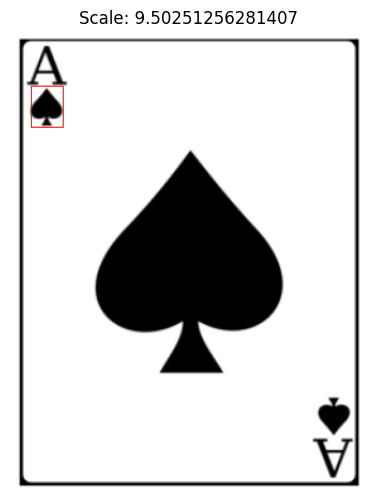

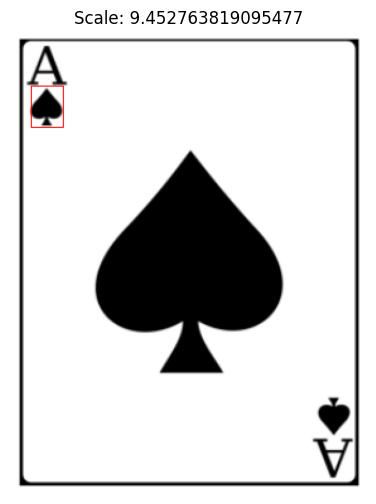

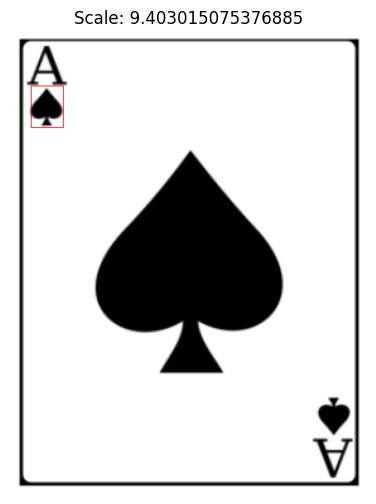

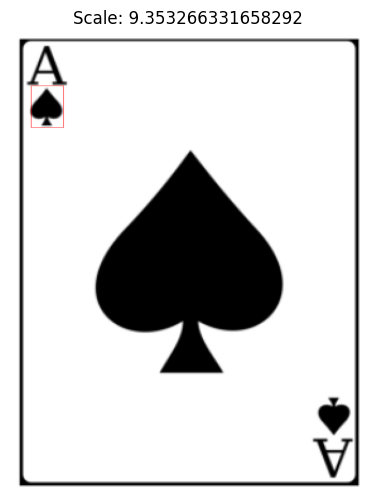

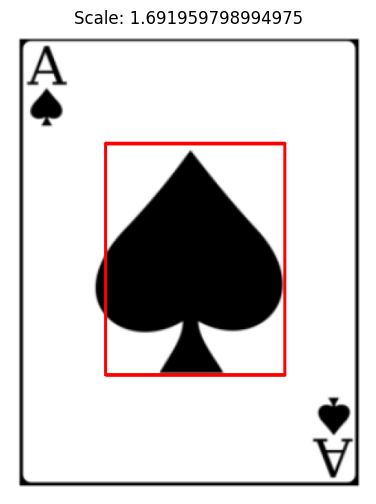

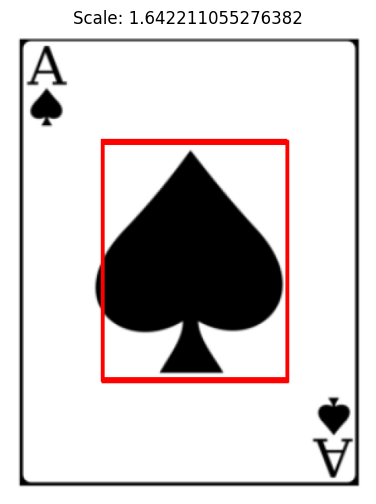

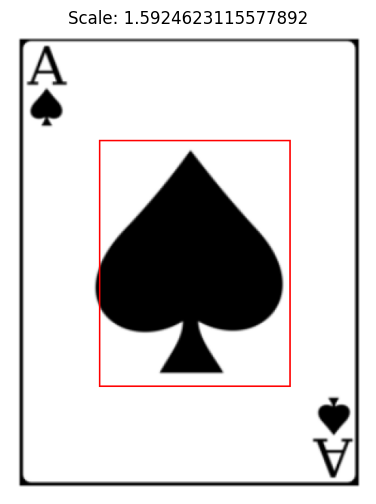

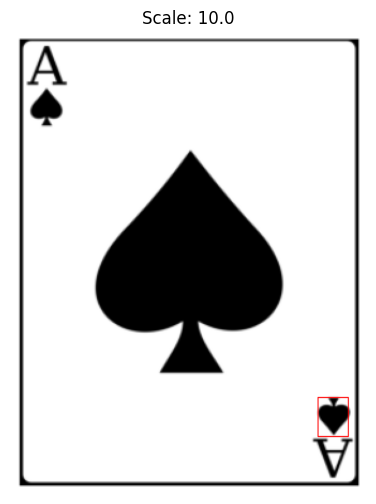

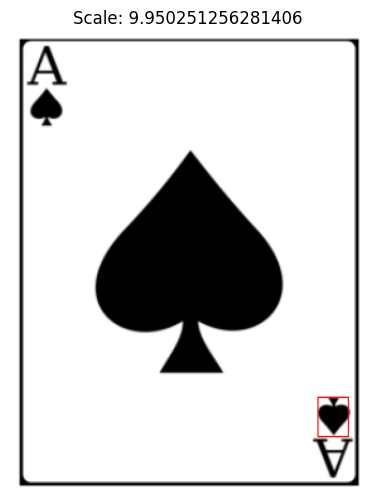

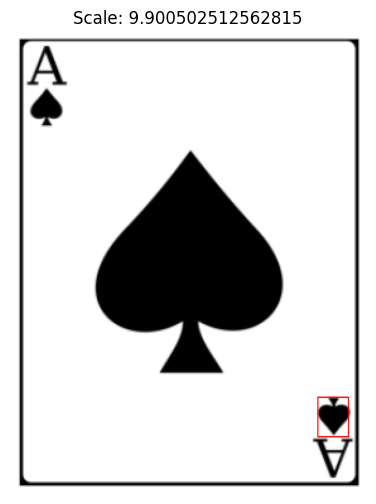

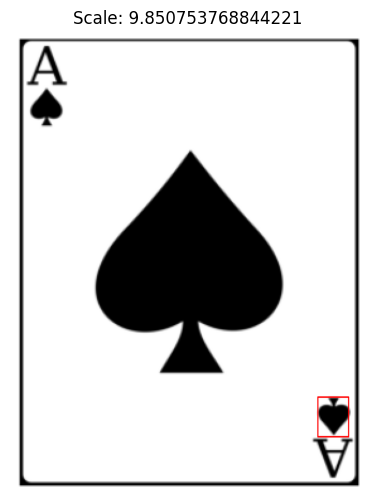

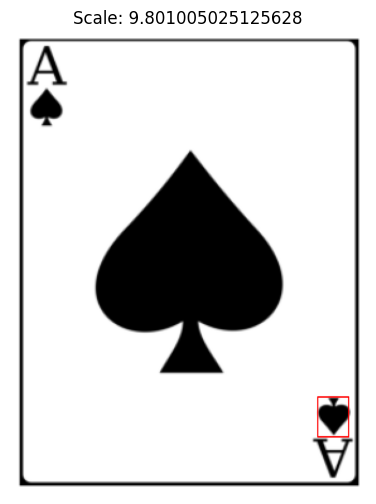

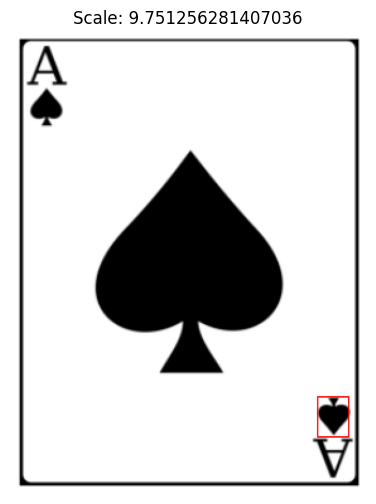

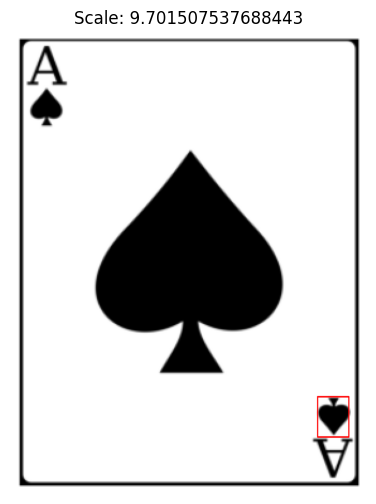

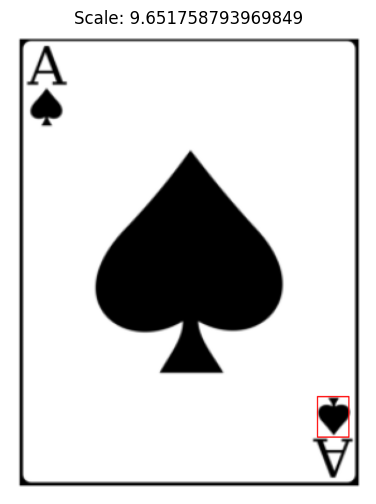

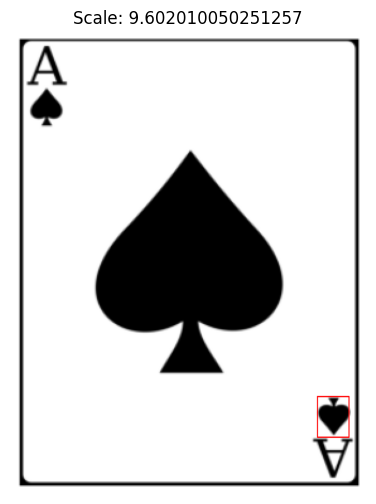

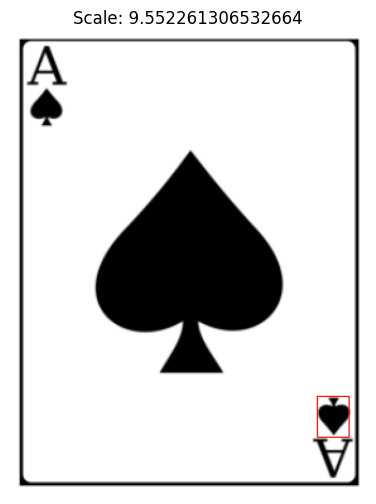

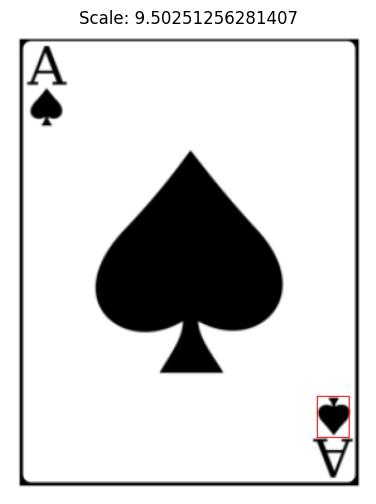

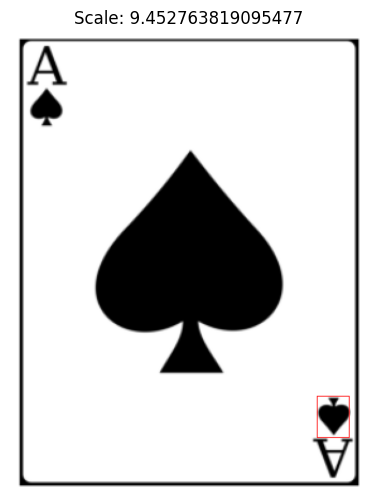

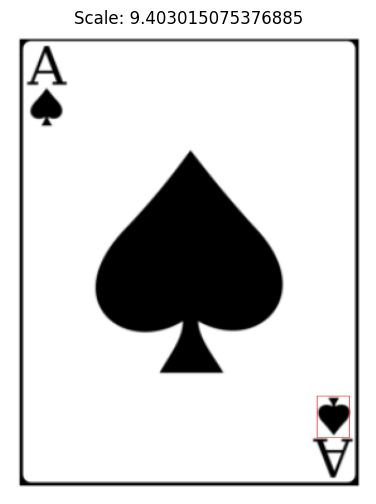

In [9]:
import imutils
THRESHOLD = 0.9
template_2 = template
img_2 = cv2.imread('/kaggle/input/image-processing-data/big10.png')
for _ in range(4):
    for scale in np.linspace(0.1, 10.0, 200)[::-1]:
        resized = imutils.resize(img_2, width=int(img_2.shape[1] * scale))
        img_gray_2 = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        if resized.shape[0] < template_height or resized.shape[1] < template_width:
            break        
        res = cv2.matchTemplate(img_gray_2, template, cv2.TM_CCOEFF_NORMED)
        loc_2 = np.where(res >= THRESHOLD)

        if len(loc_2[0]) == 0:
            continue
    
        for y, x in zip(loc_2[0], loc_2[1]):
            cv2.rectangle(resized, (x, y), (x + w, y + h), (255,0,0), 1)
        imshow(resized, title=f"Scale: {scale}")
    template = cv2.rotate(template, cv2.ROTATE_90_CLOCKWISE)
    w, h = template.shape[1], template.shape[0]
    template_height, template_width = h, w


(1000, 1000, 3)
(328, 123)


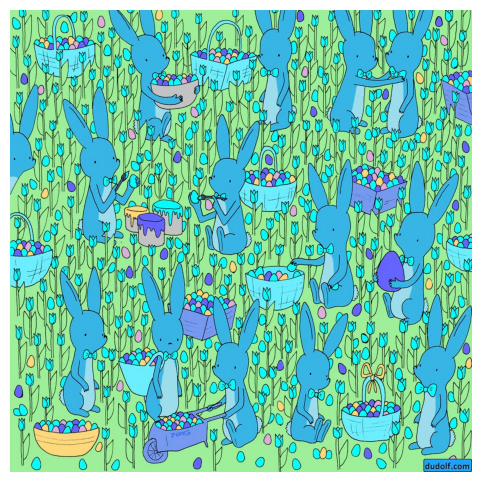

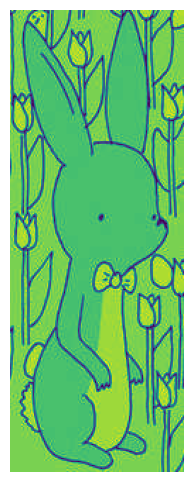

In [10]:
def compute_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    
    iou = inter_area / (box1_area + box2_area - inter_area)
    
    return iou

img = cv2.imread('/kaggle/input/image-processing-data/Counting/rabbit.jpeg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('/kaggle/input/image-processing-data/Counting/rabbit_template.jpeg', 0)
w, h = template.shape[1], template.shape[0]
template_height, template_width = h, w
imshow(img)
imshow(template)
print(img.shape)
print(template.shape)

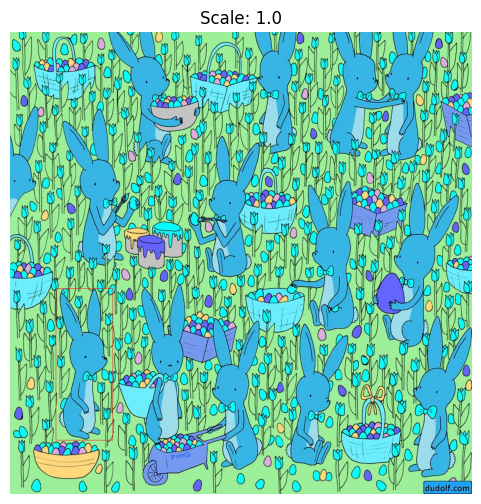

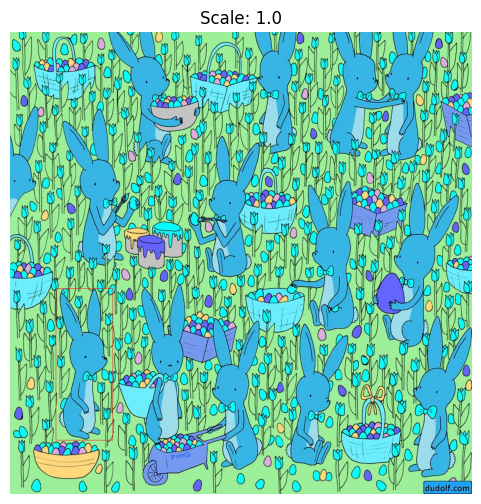

In [11]:
import imutils
THRESHOLD = 0.6
IOU_THRESHOLD = 0.6
template_2 = template
img_f = img
for flip in range(3):
    for _ in range(4):
        for scale in np.linspace(0.1, 5.0, 50)[::-1]:
            resized = imutils.resize(img_f, width=int(img_f.shape[1] * scale))
#             edged = cv2.Canny(resized, 50, 200)
            img_gray_2 = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
            if resized.shape[0] < template_height or resized.shape[1] < template_width:
                break        
            res = cv2.matchTemplate(img_gray_2, template, cv2.TM_CCOEFF_NORMED)
            loc_2 = np.where(res >= THRESHOLD)

            if len(loc_2[0]) == 0:
                continue
            detections = []
            for y, x in zip(loc_2[0], loc_2[1]):
                detected_box = (x, y, x + template_width, y + template_height)
                is_duplicate = False
                for existing_box in detections:
                    iou = compute_iou(detected_box, existing_box)
                    if iou > IOU_THRESHOLD:
                        is_duplicate = True
                        break

                if not is_duplicate:
                    detections.append(detected_box)
                    cv2.rectangle(resized, (x, y), (x + template_width, y + template_height), (255, 0, 0), 1)
            imshow(resized, title=f"Scale: {scale}")

        template = cv2.rotate(template, cv2.ROTATE_90_CLOCKWISE)
        w, h = template.shape[1], template.shape[0]
        template_height, template_width = h, w
    if flip:
        img_f = cv2.flip(img, flip)
